# Explorative Data Analysis - Patients

In this notebook you find the explorative data analysis for the data of patients.
There is also diagnostic data of the patients, data of the used MRI machines and there is also laboratory data available.


## Imports and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set default plt figsize to (12,6)
plt.rcParams["figure.figsize"] = (12,6)
pd.set_option('display.colheader_justify', 'center')


import os
print(os.getcwd())
if os.getcwd().endswith("eda"):
    os.chdir("..")
    from src.imputation import impute_dataframe,get_imputation_values
    os.chdir("eda")


c:\Users\Tom\OneDrive\Dokumente\Github\pro5d-classification-prolactinoma\eda


In [2]:
# runs the clean and preprocessing notebook
%run "clean_preprocessing.ipynb"

Start Clean and Preprocessing patients-data
End Clean and Preprocessing patient data
Start Clean and Preprocessing mri data
0 Cases were deleted, because they were same-day duplicates.
End Clean and Preprocessing mri data
Start Clean and Preprocessing lab-data
0 Cases were deleted, because they were same-day duplicates.
Sparsity of labordata: 0.371 %
End Clean and Preprocessing labor data
There are 399 MRI's with all constraints applied!
There are 439 Lab's with all constraints applied!
There are 92 Combinations with all constraints applied!
There are 347 Lab's which are dirty!
There are 307 MRI's which are dirty!


In [3]:
# runs the data_partitioning notebook
%run "data_partitioning.ipynb"

Start Data Partitioning
Total Dataframe LAB rows: 347
Total Dataframe MRI rows: 307
Total Dataframe Fold 1 rows: 61
Total Dataframe Fold 2 rows: 72
Total Dataframe Fold 3 rows: 51
Total Dataframe Fold 4 rows: 56
Total Dataframe Fold 5 rows: 67
Label Distribution relative Difference between Fold 0 vs. Fold 1:
 ± 0.11 %
Label Distribution relative Difference between Fold 0 vs. Fold 2:
 ± 0.063 %
Label Distribution relative Difference between Fold 0 vs. Fold 3:
 ± 0.078 %
Label Distribution relative Difference between Fold 0 vs. Fold 4:
 ± 0.204 %
Label Distribution relative Difference between Fold 1 vs. Fold 2:
 ± 0.173 %
Label Distribution relative Difference between Fold 1 vs. Fold 3:
 ± 0.032 %
Label Distribution relative Difference between Fold 1 vs. Fold 4:
 ± 0.314 %
Label Distribution relative Difference between Fold 2 vs. Fold 3:
 ± 0.141 %
Label Distribution relative Difference between Fold 2 vs. Fold 4:
 ± 0.141 %
Label Distribution relative Difference between Fold 3 vs. Fold 4

In [4]:
# read train data set
df = pd.read_csv(r'../data/train/train_lab_data.csv')

In [5]:
df = impute_dataframe(df,get_imputation_values(df))

In [6]:
# make datetime values
df["Date_Case"] = pd.to_datetime(df["Date_Case"])
df["Diagnosis_Date"] = pd.to_datetime(df["Diagnosis_Date"])
df["Operation_date"] = pd.to_datetime(df["Operation_date"])
# set category data type in pandas, check datatypes
df['Adenoma_size'] = df['Adenoma_size'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Patient_gender'] = df['Patient_gender'].astype('category')

## Dataframe Summary

In [7]:
df.head()

,index,Patient_ID,Case_ID,Auftragsdatum,COR,FSH,FT4,IGF1,LH,PROL,...,Pre_OP_hormone_gonado,Pre_OP_hormone_hyperprolaktinstressbedingt,Pre_OP_hormone_somato,Pre_OP_hormone_adh,Pre_OP_hormone_thyreo,Pre_OP_hormone_keine,Pre_OP_hormone_inaktiv,Category,fold,fold_learning_curve
0,81,23333,41009440,2020-08-21,658.5,5.550,12.1000,13.900,3.15,12.6,...,0,0,0,0,0,1,0,non-prolaktinom,1,2.0
1,27,718384,41042244,2020-11-03,35.0,4.875,11.1000,22.401,5.19,62.8,...,0,0,0,0,0,1,0,non-prolaktinom,0,5.0
2,229,593992,41088917,2021-05-25,550.0,3.435,12.5000,12.100,3.79,12.1,...,1,0,0,0,0,0,0,prolaktinom,2,3.0
3,204,464458,41049915,2020-11-19,550.0,5.500,15.4452,17.030,2.80,13.1,...,0,0,0,0,0,1,0,non-prolaktinom,1,3.0
4,147,283111,41748822,2023-03-07,550.0,4.875,16.0000,19.388,5.19,252.5,...,0,0,0,0,0,1,0,non-prolaktinom,1,3.0


In [8]:
df.tail()

,index,Patient_ID,Case_ID,Auftragsdatum,COR,FSH,FT4,IGF1,LH,PROL,...,Pre_OP_hormone_gonado,Pre_OP_hormone_hyperprolaktinstressbedingt,Pre_OP_hormone_somato,Pre_OP_hormone_adh,Pre_OP_hormone_thyreo,Pre_OP_hormone_keine,Pre_OP_hormone_inaktiv,Category,fold,fold_learning_curve
302,166,362517,10279517,2020-10-26,550.0,3.435,10.70000,22.401,3.79,61.60,...,1,0,0,0,0,0,0,prolaktinom,3,4.0
303,137,200941,41624372,2023-05-15,550.0,13.400,12.50000,22.300,5.26,8.82,...,1,0,0,0,0,0,0,prolaktinom,4,1.0
304,133,180749,10191765,2019-07-09,550.0,4.875,12.50000,16.899,5.19,252.50,...,0,0,0,0,0,1,0,non-prolaktinom,2,0.0
305,282,771570,40645595,2019-10-09,550.0,3.435,16.21746,23.973,3.79,1.60,...,1,0,0,0,0,0,0,prolaktinom,2,0.0
306,174,393986,40333032,2018-09-17,477.0,6.800,13.20000,16.899,10.30,9.00,...,0,0,0,0,0,1,0,non-prolaktinom,0,0.0


In [9]:
print("Total Dataframe rows:", len(df))
print("Total Dataframe columns:", len(df.columns))
label_col = 'Category'
non_prol_n = len(df[df[label_col] == 'non-prolaktinom'])
prol_n = len(df[df[label_col] == 'prolaktinom'])
print("Dataframe rows with prolatinom label:", prol_n)
print("Dataframe rows with non-prolatinom label:", non_prol_n)

Total Dataframe rows: 307
Total Dataframe columns: 29
Dataframe rows with prolatinom label: 113
Dataframe rows with non-prolatinom label: 194


## Distribution Analysis
we will take a look at the distributions of the variables and check for outliers as well.

### Data of MRI
First we will take a look at the distribution of the data for the MRI which were done. 

In [10]:
column = 'Date_Case'
print("Range of Case dates:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Case dates: 21.04.2016 to 11.05.2023
Missing values: 0


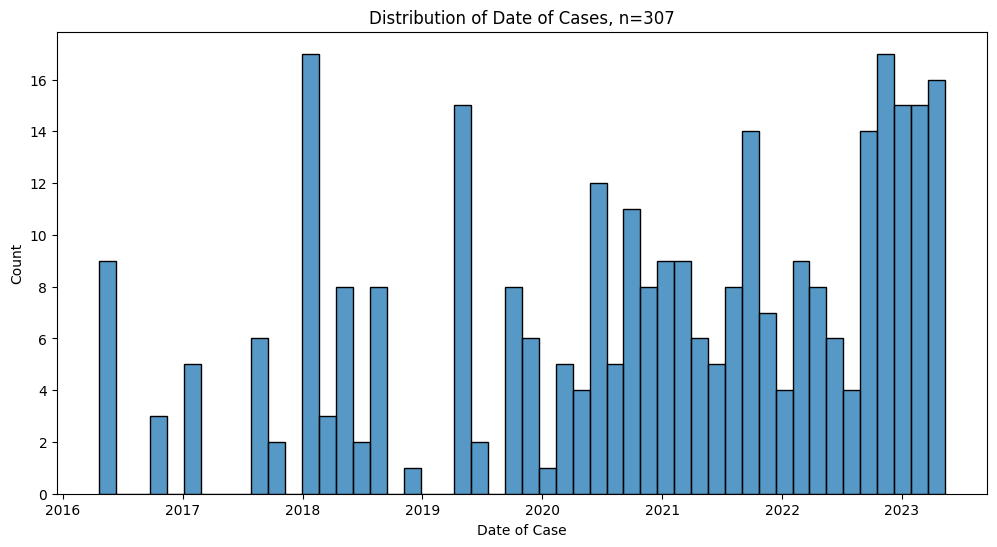

In [11]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of Date of Cases, n={len(df[column])}")
plt.xlabel('Date of Case')
plt.show()

### Data Features (screening data)

#### Adenoma Size
The column for the 'Adenoma_size' describes if an Adenoma was labeled as micro or macro.
Micro is defined as <10mm and a macro is defined as >= 10 mm in size.

In [12]:
column= 'Adenoma_size'
print(f"Summary Statistics:\n{df[column].describe()}")
print(f"Percentage Distribution:\n{df[column].value_counts(normalize=True) * 100}")
print(f"Missing values Adenoma size:{sum(df[column].isna())}")

Summary Statistics:
count       295
unique        2
top       mikro
freq        154
Name: Adenoma_size, dtype: object
Percentage Distribution:
Adenoma_size
mikro    52.20339
makro    47.79661
Name: proportion, dtype: float64
Missing values Adenoma size:12


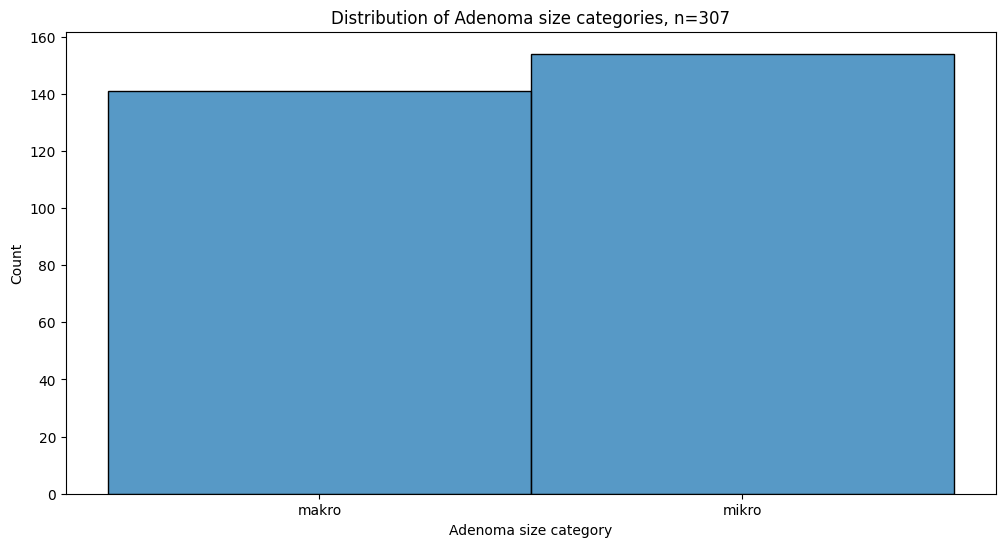

In [13]:
sns.histplot(df[column])
plt.title(f"Distribution of Adenoma size categories, n={len(df[column])}")
plt.xlabel('Adenoma size category')
plt.show()

#### Pre Operation hormonal disfunctions
The column for the 'Ausfälle prä' describes if a patient was experiencing an under- or an overproduction of a type of hormone (produced by the pituitary gland) before an operation.
Values which indicate a prolaktinoma are an overproduction of prolactin (hyperprolaktin).


In [14]:
# define all "pre op" columns
pre_op_columns = [col for col in df.columns if "Pre_" in col]

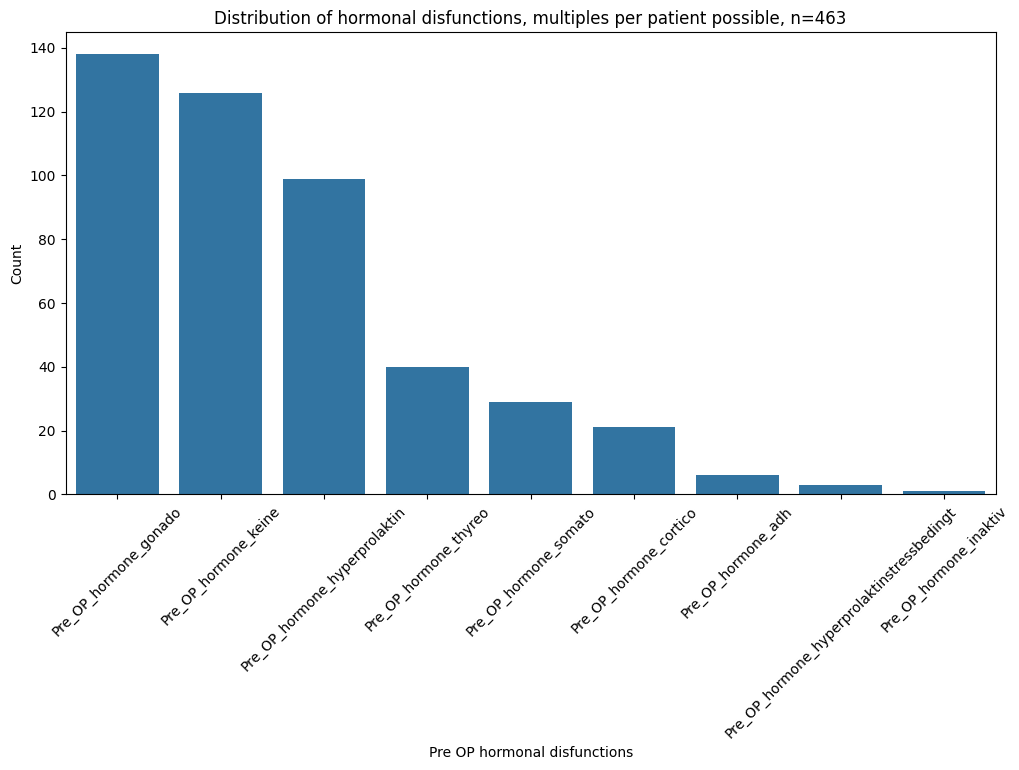

In [15]:
# summarise and sort the pre op column values
summary=df[pre_op_columns].sum().sort_values(ascending=False)
sns.barplot(x=summary.index, y=summary.values)
plt.title(f"Distribution of hormonal disfunctions, multiples per patient possible, n={sum(summary)}")
plt.xlabel("Pre OP hormonal disfunctions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Date of Entry and Operation
The columns for the 'Eintrittsdatum' and 'Operationdatum' describe when a patient entered the hospital and also when the operation took place.
The difference between these values can show the significance or the extraordinary need for an operation.

In [16]:
column = 'Diagnosis_Date'
print("Range of Diagnosis date:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Diagnosis date: 01.01.1992 to 01.09.2023
Missing values: 0


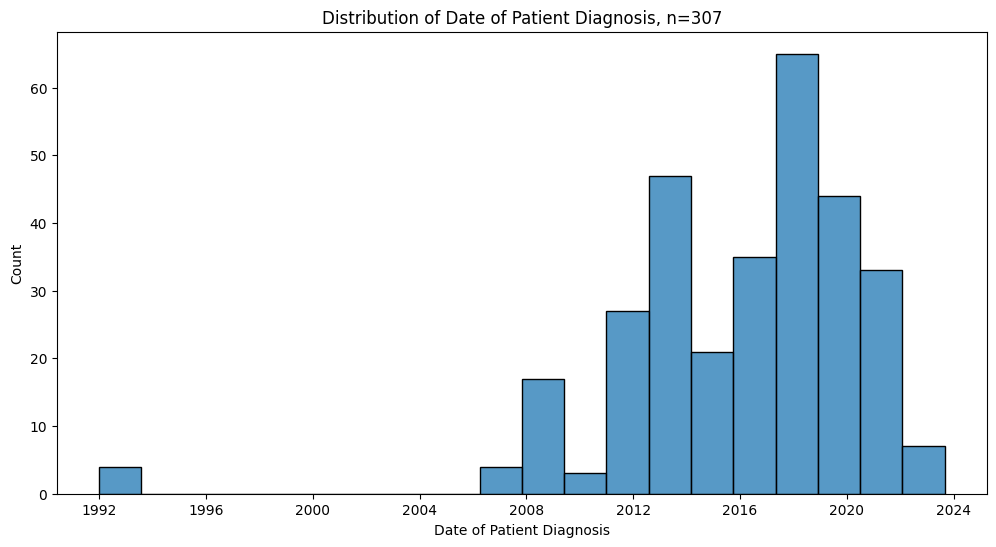

In [17]:
sns.histplot(df[column])
plt.title(f"Distribution of Date of Patient Diagnosis, n={len(df[column])}")
plt.xlabel('Date of Patient Diagnosis')
plt.show()

In [18]:
column = 'Operation_date'
print("Range of Operation date:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Operation date: 26.02.2018 to 14.09.2023
Missing values: 251


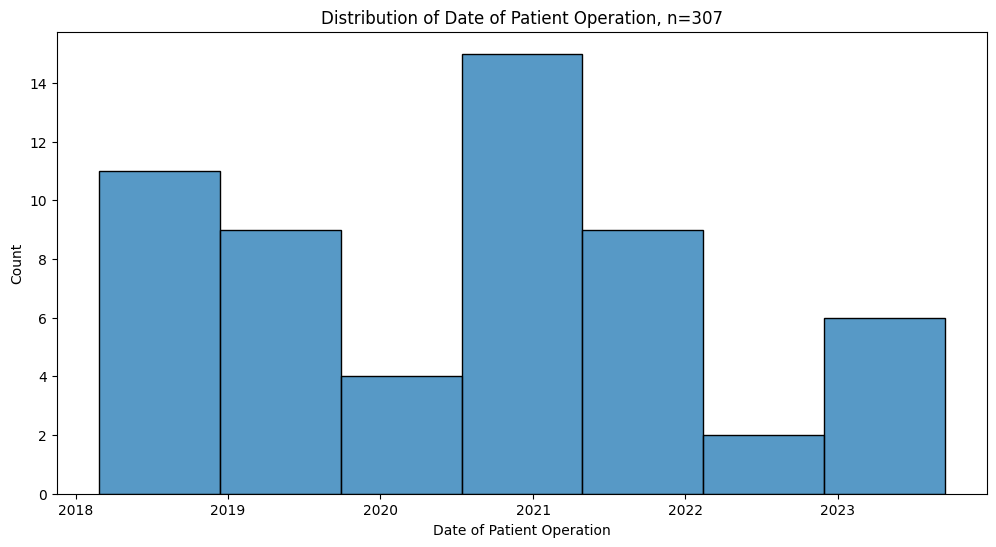

In [19]:
sns.histplot(df[column])
plt.title(f"Distribution of Date of Patient Operation, n={len(df[column])}")
plt.xlabel('Date of Patient Operation')
plt.show()

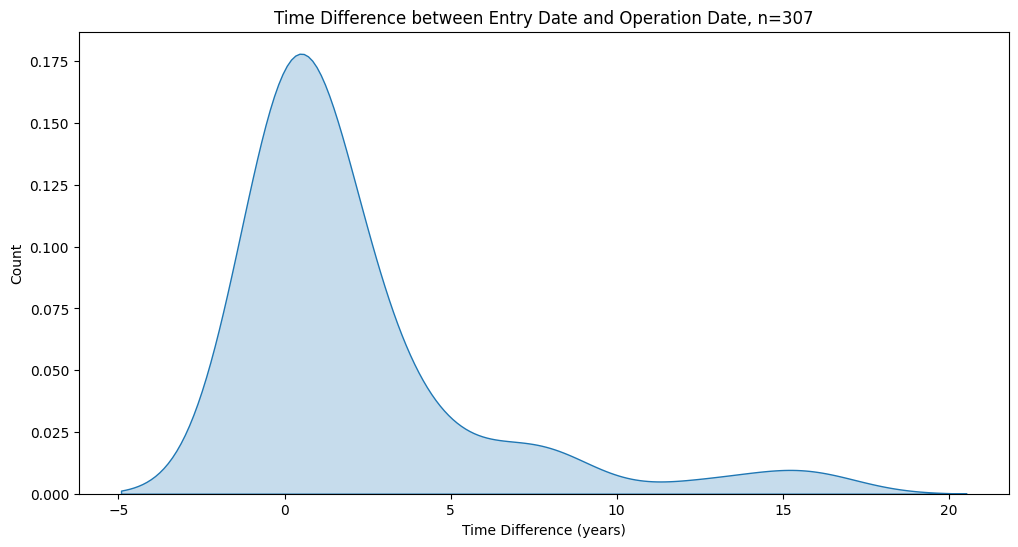

In [20]:
# calculate time difference in years between operation and entry date
df['EDDate_OPDate_Difference'] = (df['Operation_date'] - df['Diagnosis_Date']).dt.days /365
# Create a histogram to visualize the time differences
sns.kdeplot(df['EDDate_OPDate_Difference'], fill=True)
plt.title(f"Time Difference between Entry Date and Operation Date, n={len(df[column])}")
plt.xlabel("Time Difference (years)")
plt.ylabel("Count")
plt.show()

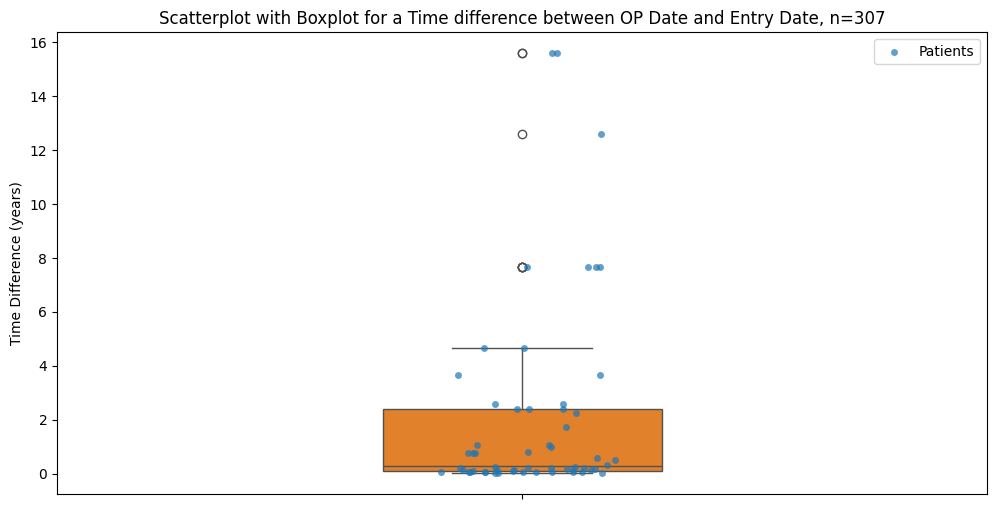

In [21]:
sns.stripplot(y=df['EDDate_OPDate_Difference'], jitter=True, legend=False,alpha=0.7,label="Patients")
sns.boxplot(y=df['EDDate_OPDate_Difference'], width=0.3)
plt.title(f"Scatterplot with Boxplot for a Time difference between OP Date and Entry Date, n={len(df[column])}")
plt.ylabel("Time Difference (years)")
plt.show()

#### Patient gender
The Patients gender is in the data set. It might be needed to impute certain missing values of hormone levels.

Summary Statistics Patient Gender:
 count        307
unique         2
top       female
freq         158
Name: Patient_gender, dtype: object
Missing values: 0


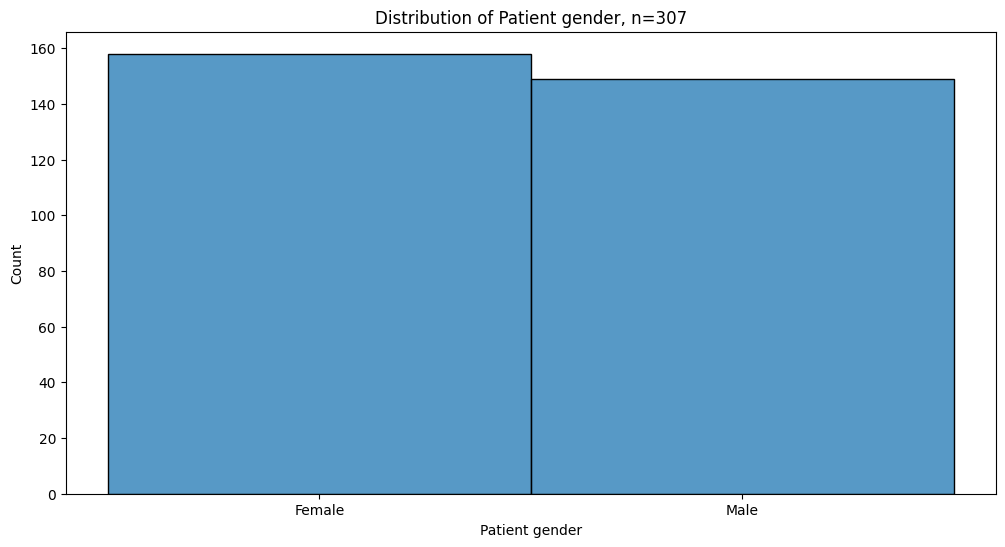

In [22]:
column = 'Patient_gender'
print("Summary Statistics Patient Gender:\n", df[column].describe())
print("Missing values:", sum(df[column].isna()))
sns.histplot(df[column],bins=30)
plt.title(f"Distribution of Patient gender, n={len(df[column])}")
plt.xlabel('Patient gender')
plt.xticks([0, 1], ['Female', 'Male'])  # Replace 0 and 1 with Female and Male
plt.show()

#### Patient Age
The Patients age is also the data set. It might be needed to impute certain missing values of hormone levels.


Range of ages: 17 to 85
Mean Patient Age: 50.648208469055376
Median Patient Age: 50.0
Missing values Patient Age: 0


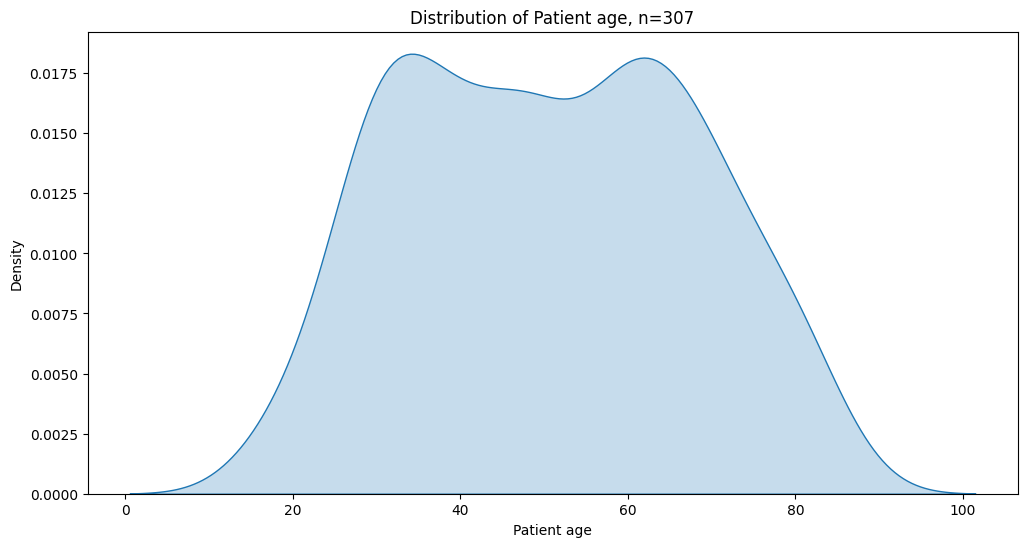

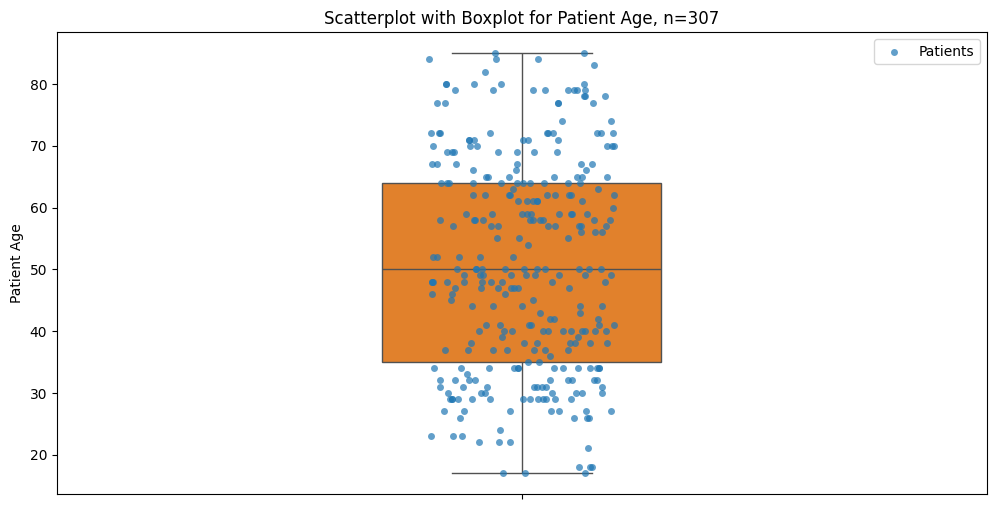

In [23]:
column = 'Patient_age'
print("Range of ages:", df[column].min(), "to", df[column].max())
print("Mean Patient Age:", df[column].mean())
print("Median Patient Age:", df[column].median())
print("Missing values Patient Age:", sum(df[column].isna()))
sns.kdeplot(df[column], fill=True)
plt.title(f"Distribution of Patient age, n={len(df[column])}")
plt.xlabel('Patient age')
plt.show()
sns.stripplot(y=df[column], jitter=True, legend=False,alpha=0.7,label="Patients")
sns.boxplot(y=df[column], width=0.3)
plt.title(f"Scatterplot with Boxplot for Patient Age, n={len(df[column])}")
plt.ylabel("Patient Age")
plt.legend()
plt.show()

### Data Laboratory Data (hormonal data)

Some Patients are missing lab values because they were transferred from external facilities like Kantonsspital Baden (KSB).
If the data was found by the labelers, we can include it in the models.

#### Prolactin (hormone)
The Column 'Prolactin' contains the measured values of prolactin for the patient.


Range of Prolactin: 0.3 to 292.9
Mean Prolactin: 53.73956677524429
Median Prolactin: 12.2
Missing values: 0


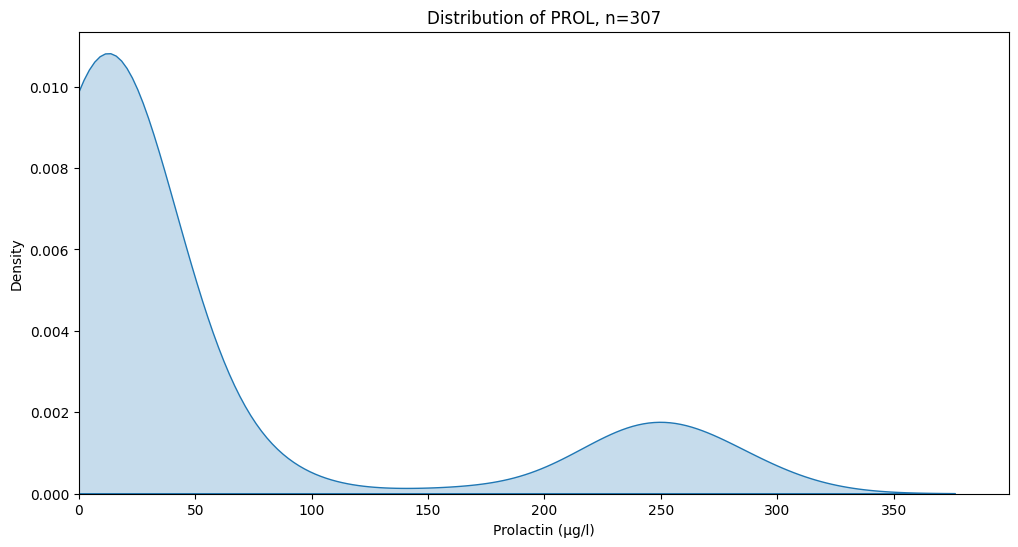

In [24]:
column = 'PROL'
label_col = 'Category'
print("Range of Prolactin:", df[column].min(), "to", df[column].max())
print("Mean Prolactin:", df[column].mean())
print("Median Prolactin:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column], fill=True)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('Prolactin (μg/l)')
plt.xlim(0, None)
plt.show()

Range of Prolactin for 'prolaktinom': 0.3 to 272.4
Mean Prolactin for 'prolaktinom': 28.06504424778761
Median Prolactin for 'prolaktinom': 10.6
Missing values for 'prolaktinom': 0


Range of Prolactin for 'non-prolaktinom': 0.437 to 292.9
Mean Prolactin for 'non-prolaktinom': 68.69431443298969
Median Prolactin for 'non-prolaktinom': 13.6
Missing values for 'non-prolaktinom': 0


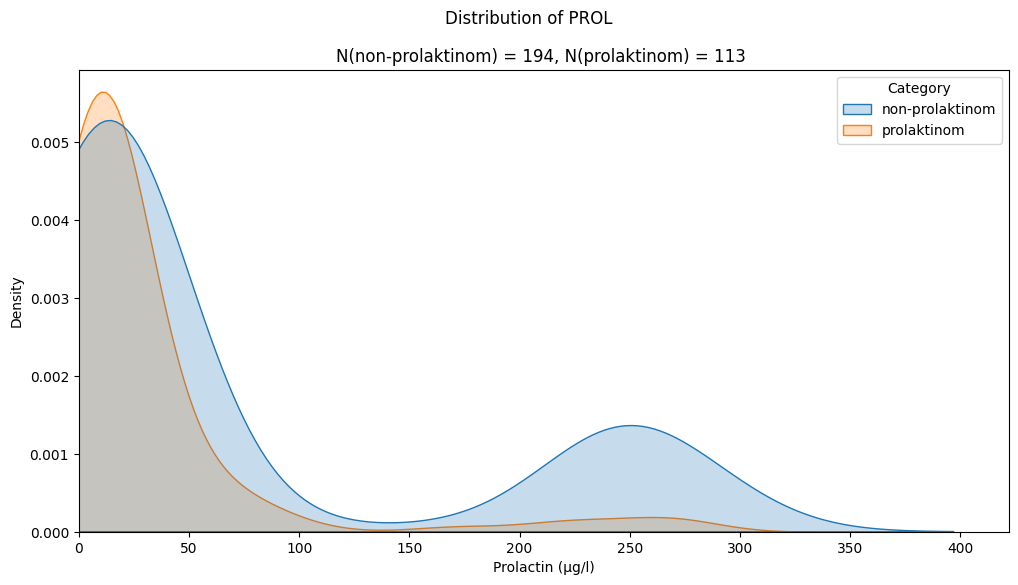

In [25]:
print("Range of Prolactin for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean Prolactin for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median Prolactin for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of Prolactin for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean Prolactin for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median Prolactin for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Prolactin (μg/l)')
plt.xlim(0, None)
plt.show()

#### Cortisol
The Column 'COR' contains the measured values of Cortisol for the patient.


Range of Cortisol: 0.256 to 962.0
Mean Cortisol: 470.51997394136805
Median Cortisol: 550.0
Missing values Cortisol: 0


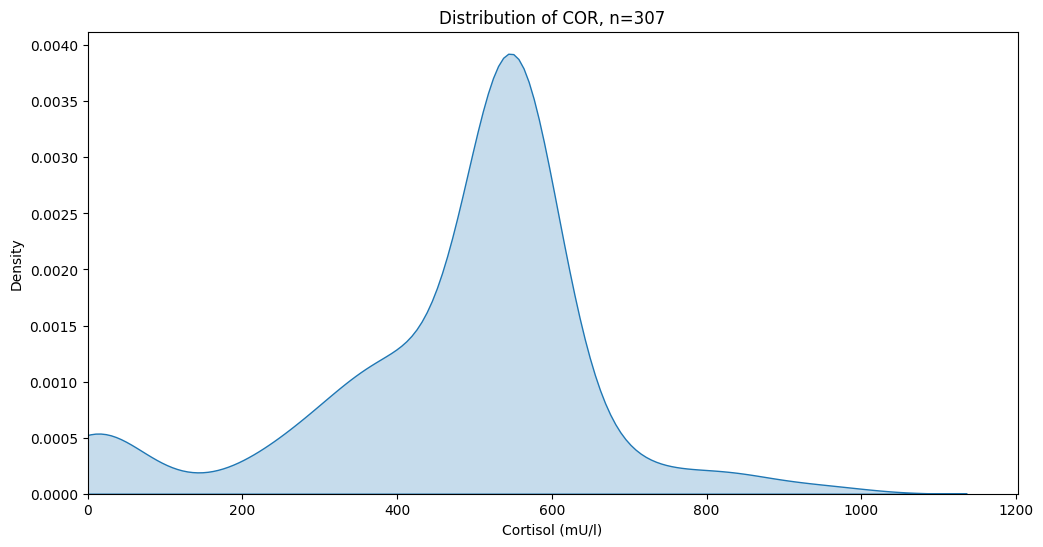

In [26]:
column = 'COR'
print("Range of Cortisol:", df[column].min(), "to", df[column].max())
print("Mean Cortisol:", df[column].mean())
print("Median Cortisol:", df[column].median())
print("Missing values Cortisol:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('Cortisol (mU/l)')
plt.xlim(0, None)
plt.show()

Range of Cortisol for 'prolaktinom': 0.423 to 866.0
Mean Cortisol for 'prolaktinom': 523.9839159292035
Median Cortisol for 'prolaktinom': 550.0
Missing values Cortisol for 'prolaktinom': 0


Range of Cortisol for 'non-prolaktinom': 0.256 to 962.0
Mean Cortisol for 'non-prolaktinom': 439.3786056701031
Median Cortisol for 'non-prolaktinom': 505.75
Missing values Cortisol for 'non-prolaktinom': 0


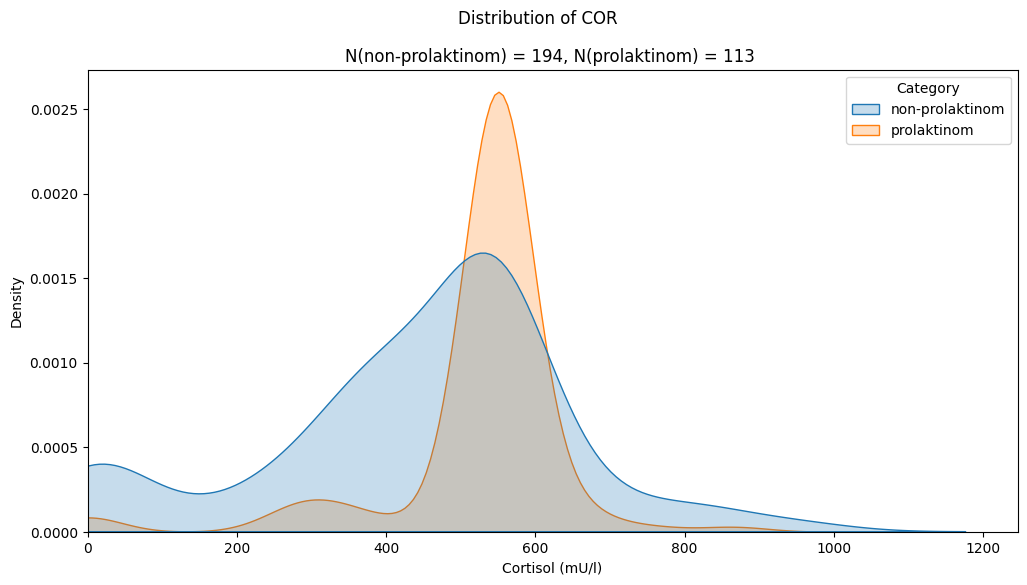

In [27]:
print("Range of Cortisol for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean Cortisol for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median Cortisol for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values Cortisol for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of Cortisol for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean Cortisol for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median Cortisol for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values Cortisol for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))

sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Cortisol (mU/l)')
plt.xlim(0, None)
plt.show()

#### IGF1 (hormone)
The Column 'IGF1' contains the measured values of Insulin-like growth factor 1 for the patient.


Range of IGF1: 1.61 to 88.2
Mean IGF1: 19.975477198697067
Median IGF1: 17.5
Missing values: 0


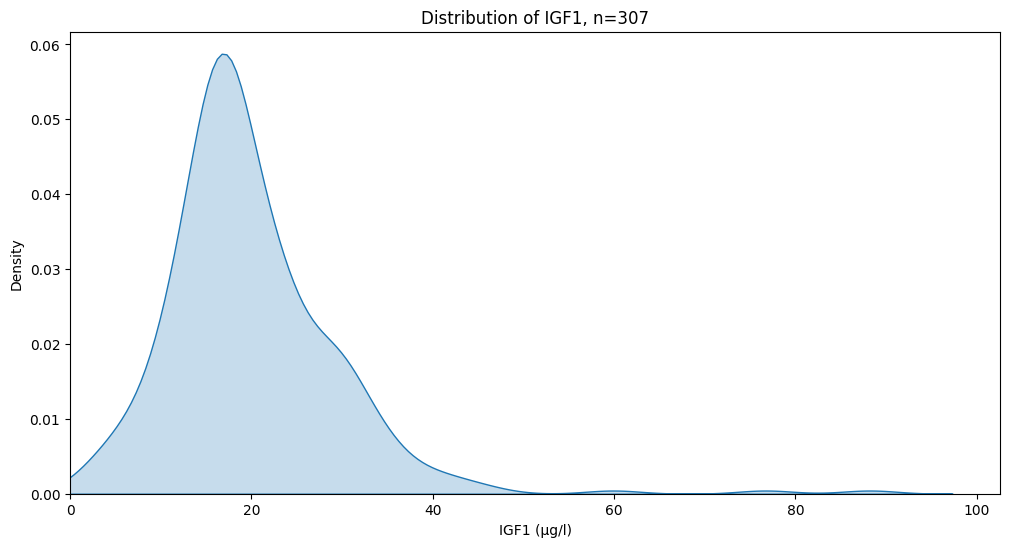

In [28]:
column = 'IGF1'
print("Range of IGF1:", df[column].min(), "to", df[column].max())
print("Mean IGF1:", df[column].mean())
print("Median IGF1:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True,)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('IGF1 (μg/l)')
plt.xlim(0, None)
plt.show()

Range of IGF1 for 'prolaktinom': 10.1 to 44.0
Mean IGF1 for 'prolaktinom': 21.716668141592923
Median IGF1 for 'prolaktinom': 22.1
Missing values IGF1 for 'prolaktinom': 0


Range of IGF1 for 'non-prolaktinom': 1.61 to 88.2
Mean IGF1 for 'non-prolaktinom': 18.961278350515464
Median IGF1 for 'non-prolaktinom': 16.9
Missing values IGF1 for 'non-prolaktinom': 0


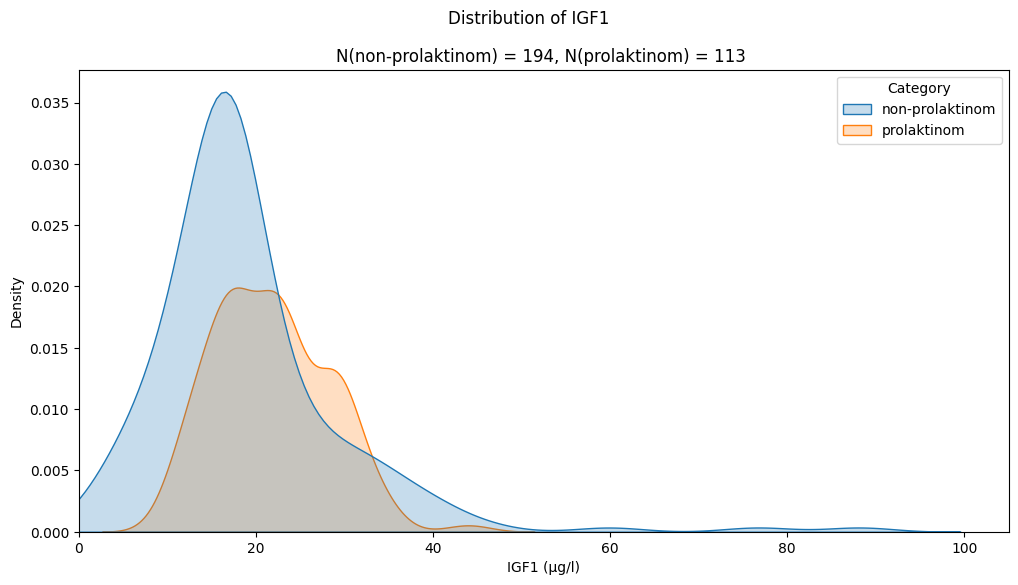

In [29]:
print("Range of IGF1 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean IGF1 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median IGF1 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values IGF1 for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of IGF1 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean IGF1 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median IGF1 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values IGF1 for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))

sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('IGF1 (μg/l)')
plt.xlim(0, None)
plt.show()

#### FT4 (hormone)
The Column 'FT4' contains the measured values of Thyroxine free hormone for the patient.


Range of FT4: 3.6 to 21.0
Mean FT4: 13.222961205211728
Median FT4: 13.0
Missing values: 0


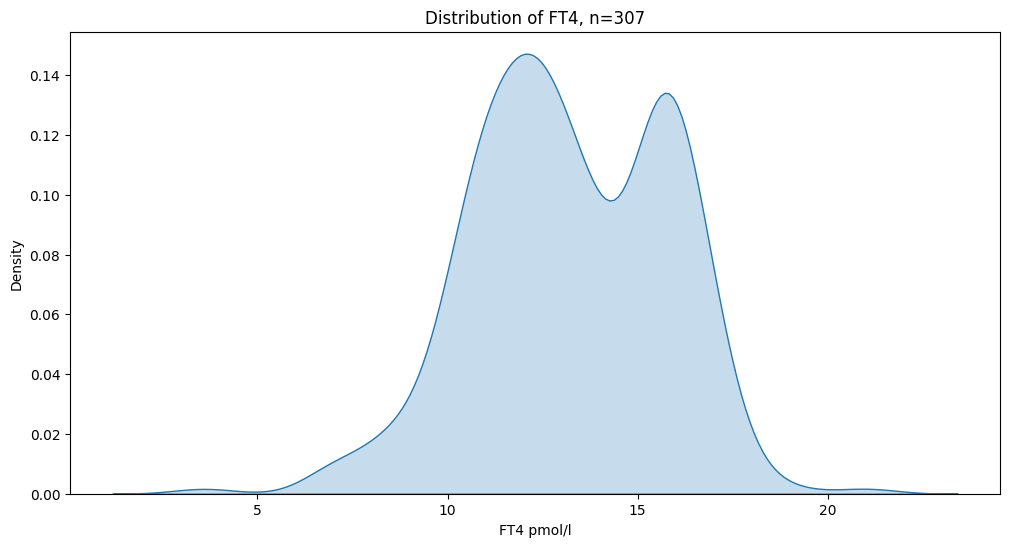

In [30]:
column = 'FT4'
print("Range of FT4:", df[column].min(), "to", df[column].max())
print("Mean FT4:", df[column].mean())
print("Median FT4:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True,)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('FT4 pmol/l')
plt.show()

Range of FT4 for 'prolaktinom': 7.3 to 18.0
Mean FT4 for 'prolaktinom': 13.758270884955753
Median FT4 for 'prolaktinom': 13.2
Missing values FT4 for 'prolaktinom': 0


Range of FT4 for 'non-prolaktinom': 3.6 to 21.0
Mean FT4 for 'non-prolaktinom': 12.91115711340206
Median FT4 for 'non-prolaktinom': 12.9
Missing values FT4 for 'non-prolaktinom': 0


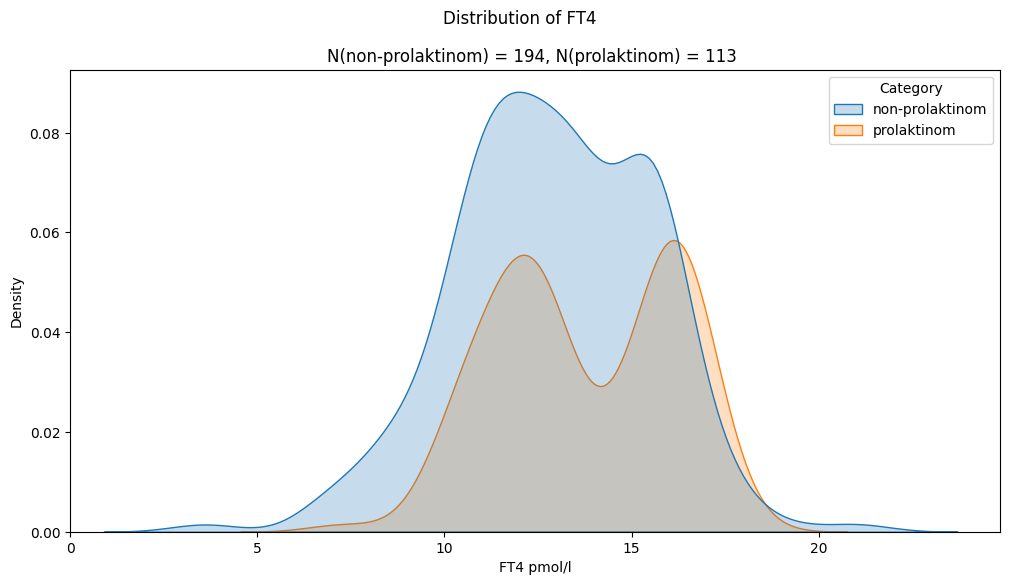

In [31]:
print("Range of FT4 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean FT4 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median FT4 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values FT4 for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of FT4 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean FT4 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median FT4 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values FT4 for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('FT4 pmol/l')
plt.xlim(0, None)
plt.show()


#### Testosteron (hormone)
The Column 'Testosteron' contains the measured values of Testosteron for the patient.


Range of Testosteron: 0.15 to 30.3
Mean Testosteron: 6.126188925081434
Median Testosteron: 1.03
Missing values: 0


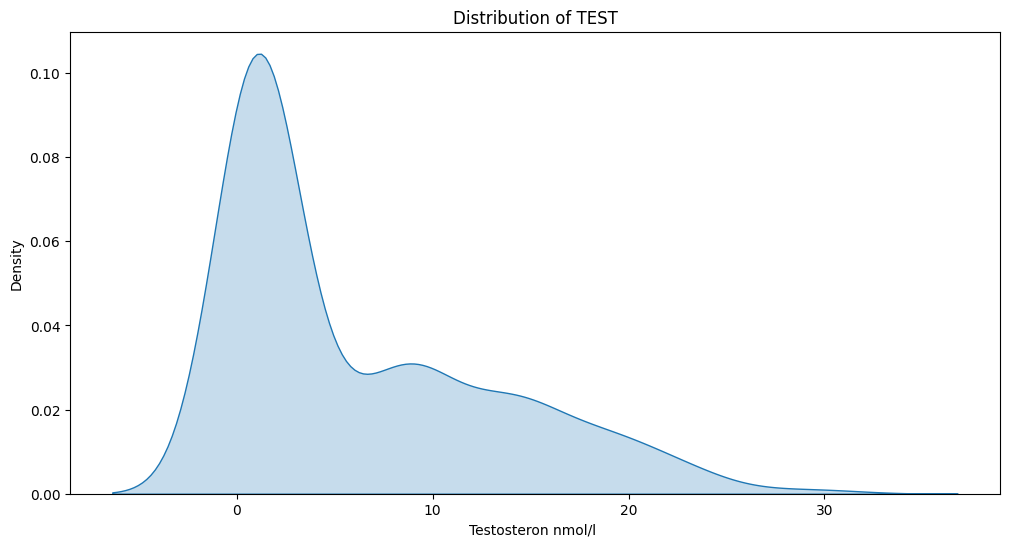

In [32]:
column = 'TEST'
print("Range of Testosteron:", df[column].min(), "to", df[column].max())
print("Mean Testosteron:", df[column].mean())
print("Median Testosteron:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True,)
plt.title(f"Distribution of {column}")
plt.xlabel('Testosteron nmol/l ')
plt.show()

Range of Testosteron for 'prolaktinom': 1.03 to 30.3
Mean Testosteron for 'prolaktinom': 7.823185840707964
Median Testosteron for 'prolaktinom': 6.15
Missing values Testosteron for 'prolaktinom': 0


Range of Testosteron for 'non-prolaktinom': 0.15 to 24.2
Mean Testosteron for 'non-prolaktinom': 5.1377319587628865
Median Testosteron for 'non-prolaktinom': 1.03
Missing values Testosteron for 'non-prolaktinom': 0


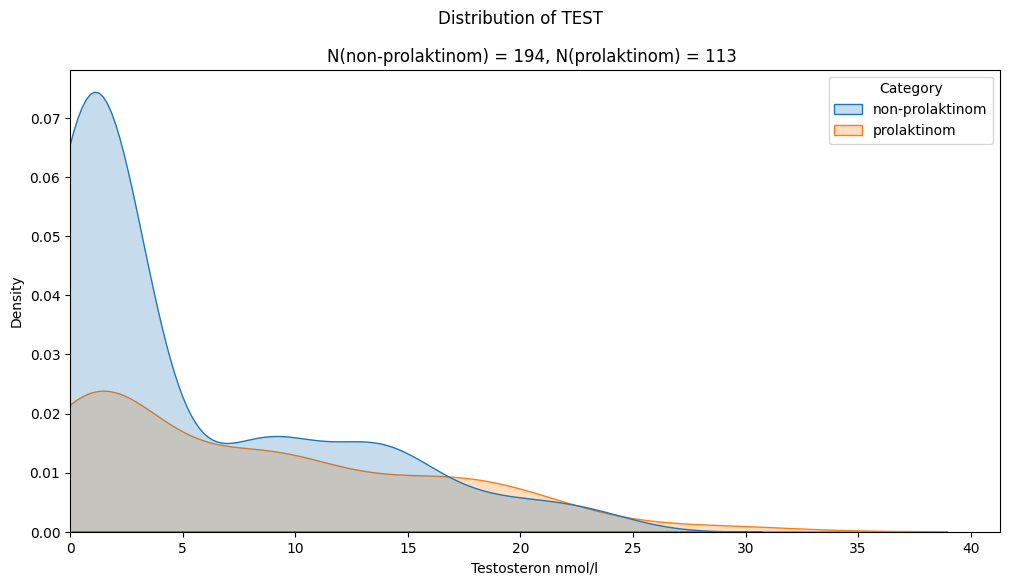

In [33]:
print("Range of Testosteron for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean Testosteron for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median Testosteron for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values Testosteron for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of Testosteron for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean Testosteron for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median Testosteron for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values Testosteron for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Testosteron nmol/l')
plt.xlim(0, None)
plt.show()

#### LH (hormone)
The Column 'LH' contains the measured values of Luteinizing Hormone for the patient.


Range of LH: 0.2 to 63.7
Mean LH: 7.305211726384366
Median LH: 3.79
Missing values: 0


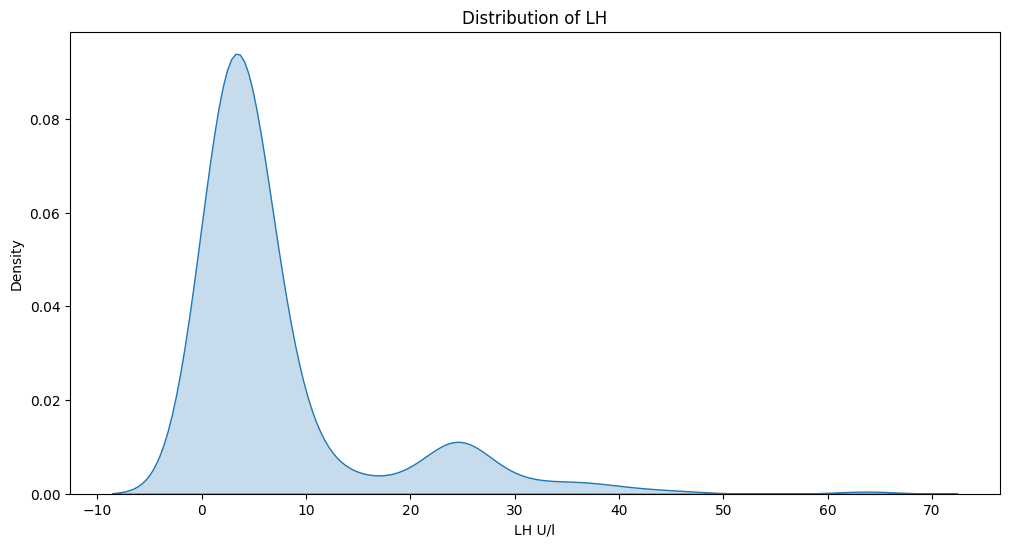

In [34]:
column = 'LH'
print("Range of LH:", df[column].min(), "to", df[column].max())
print("Mean LH:", df[column].mean())
print("Median LH:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True,)
plt.title(f"Distribution of {column}")
plt.xlabel('LH U/l')
plt.show()

Range of LH for 'prolaktinom': 0.2 to 63.7
Mean LH for 'prolaktinom': 4.805398230088495
Median LH for 'prolaktinom': 3.15
Missing values LH for 'prolaktinom': 0


Range of LH for 'non-prolaktinom': 0.2 to 45.6
Mean LH for 'non-prolaktinom': 8.761288659793815
Median LH for 'non-prolaktinom': 5.145
Missing values LH for 'non-prolaktinom': 0


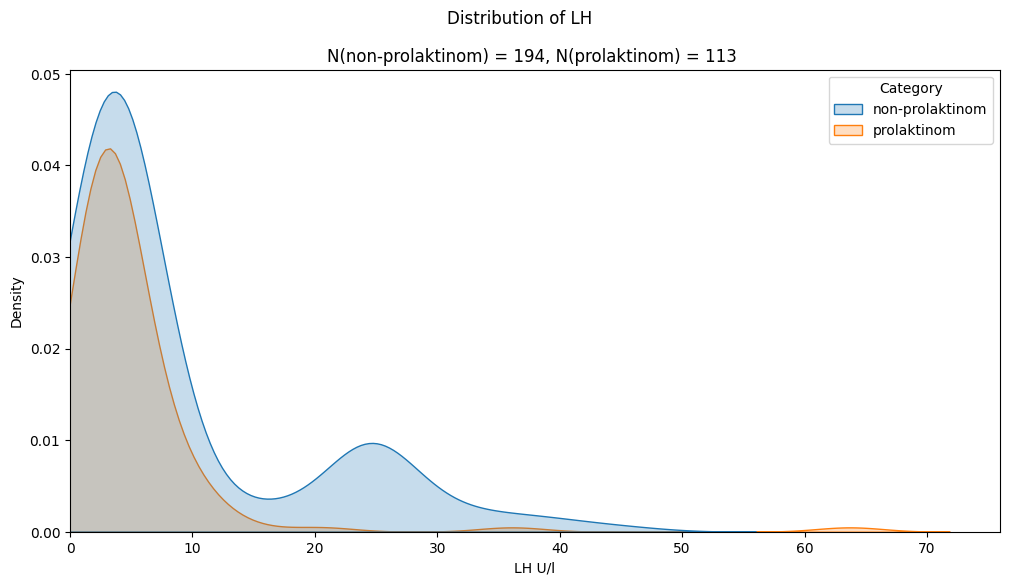

In [35]:
print("Range of LH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean LH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median LH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values LH for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of LH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean LH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median LH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values LH for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('LH U/l')
plt.xlim(0, None)
plt.show()

#### FSH (hormone)
The Column 'FSH' contains the measured values of Follicle-stimulating hormone  for the patient.


Range of FSH: 0.2 to 121.0
Mean FSH: 13.029560260586319
Median FSH: 4.875
Missing values: 0


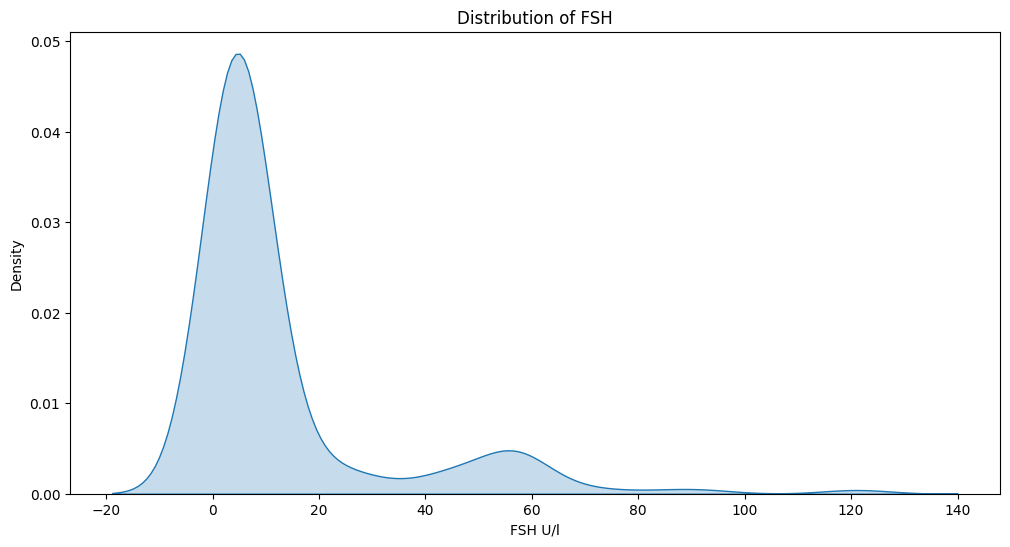

In [36]:
column = 'FSH'
print("Range of FSH:", df[column].min(), "to", df[column].max())
print("Mean FSH:", df[column].mean())
print("Median FSH:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True,)
plt.title(f"Distribution of {column}")
plt.xlabel('FSH U/l')
plt.show()

Range of FSH for 'prolaktinom': 0.2 to 121.0
Mean FSH for 'prolaktinom': 6.96358407079646
Median FSH for 'prolaktinom': 4.6
Missing values FSH for 'prolaktinom': 0


Range of FSH for 'non-prolaktinom': 0.2 to 121.0
Mean FSH for 'non-prolaktinom': 16.56283505154639
Median FSH for 'non-prolaktinom': 5.55
Missing values FSH for 'non-prolaktinom': 0


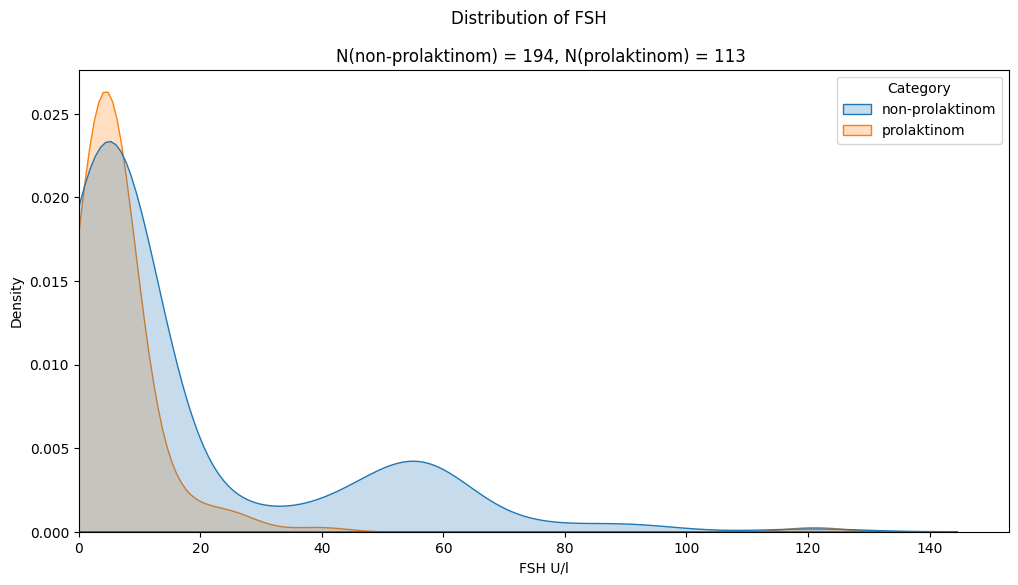

In [37]:
print("Range of FSH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean FSH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median FSH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values FSH for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of FSH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean FSH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median FSH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values FSH for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('FSH U/l')
plt.xlim(0, None)
plt.show()

### Data Labels (Medical diagnosis data)

#### Category Prolactinoma (binary Label)
The Column 'Category' contains the actual label data if a adenoma is a prolactinoma or a non-prolactinoma.


Summary Statistics:
 count                 307
unique                  2
top       non-prolaktinom
freq                  194
Name: Category, dtype: object
Percentage Distribution:
 Category
non-prolaktinom    63.192182
prolaktinom        36.807818
Name: proportion, dtype: float64
Missing values Adenoma category: 0


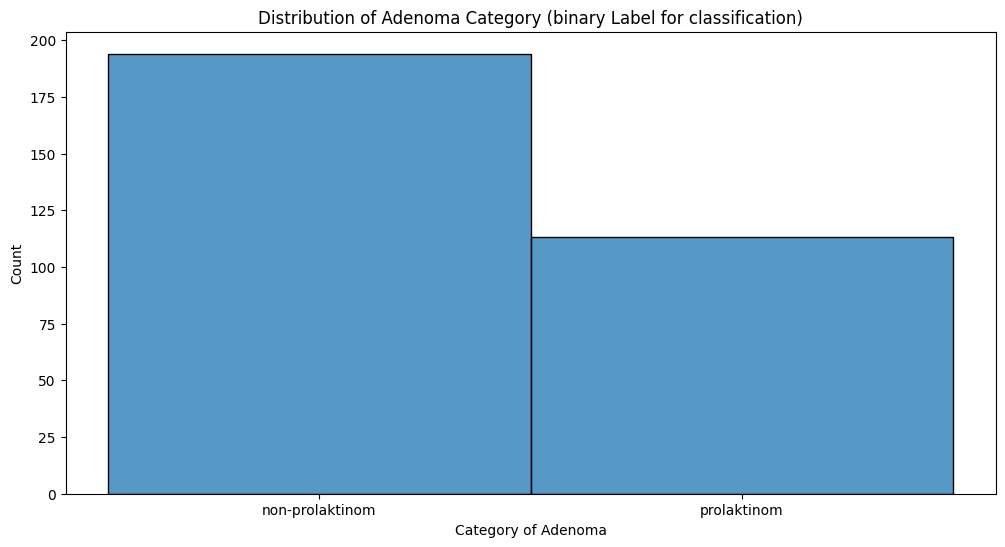

In [38]:
column = 'Category'
print("Summary Statistics:\n",df[column].describe())
print("Percentage Distribution:\n",df[column].value_counts(normalize=True) * 100)
print("Missing values Adenoma category:", sum(df[column].isna()))
sns.histplot(df[column])
plt.title(f"Distribution of Adenoma Category (binary Label for classification)")
plt.xlabel('Category of Adenoma')
plt.show()

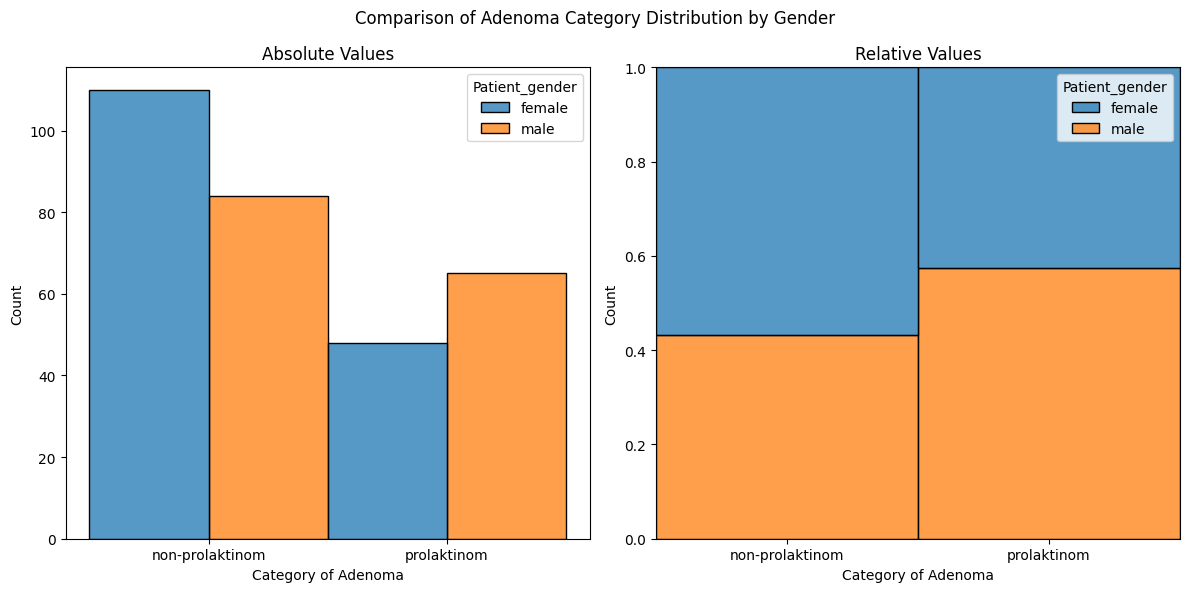

In [39]:
# Create a figure and axis (subplots)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Dodge plot
sns.histplot(df, x='Category', hue='Patient_gender', multiple='dodge', ax=axes[0])

# Set the title and labels for the first subplot
axes[0].set_title("Absolute Values")
axes[0].set_xlabel('Category of Adenoma')

# Second subplot: Fill plot
sns.histplot(df, x='Category', hue='Patient_gender', multiple='fill', ax=axes[1])

# Set the title and labels for the second subplot
axes[1].set_title("Relative Values")
axes[1].set_xlabel('Category of Adenoma')

# Adjust layout for better spacing
fig.suptitle("Comparison of Adenoma Category Distribution by Gender")
plt.tight_layout()

# Show the plot
plt.show()


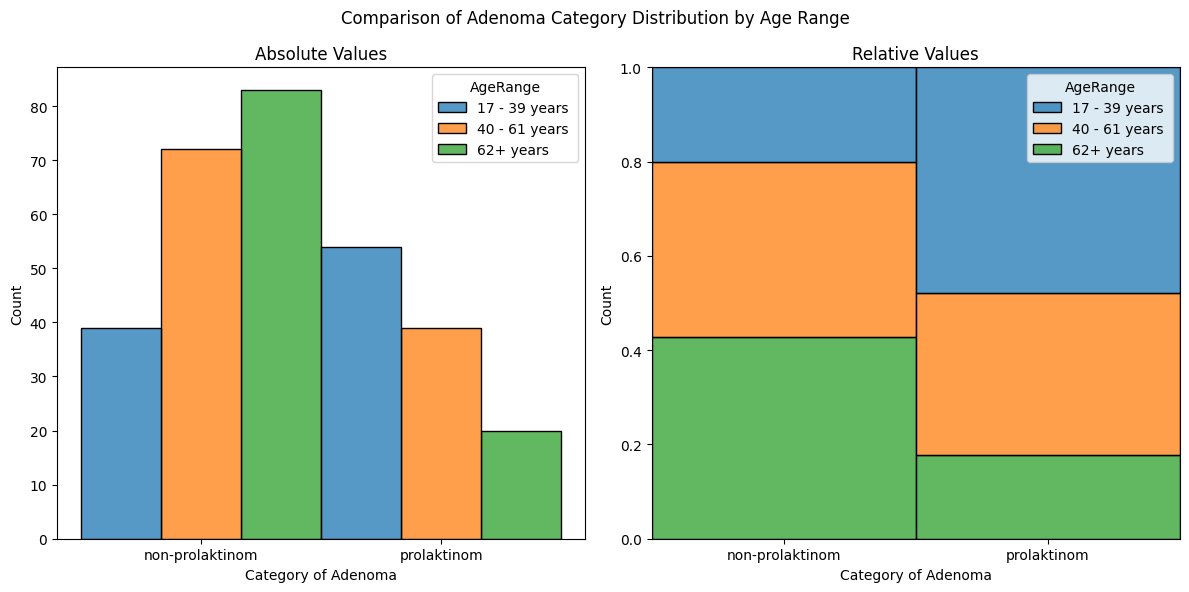

In [40]:
age_bins = [17,39,61, float('inf')]  # Define your age ranges
age_labels = ['17 - 39 years','40 - 61 years ','62+ years']  # Labels for the age ranges

# Create a new column 'AgeRange' in your DataFrame based on the age bins
df['AgeRange'] = pd.cut(df['Patient_age'], bins=age_bins, labels=age_labels, right=False)
# Create a figure and axis (subplots)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Dodge plot
sns.histplot(df, x='Category', hue='AgeRange', multiple='dodge', ax=axes[0])

# Set the title and labels for the first subplot
axes[0].set_title("Absolute Values")
axes[0].set_xlabel('Category of Adenoma')

# Second subplot: Fill plot
sns.histplot(df, x='Category', hue='AgeRange', multiple='fill', ax=axes[1])

# Set the title and labels for the second subplot
axes[1].set_title("Relative Values")
axes[1].set_xlabel('Category of Adenoma')

# Adjust layout for better spacing
fig.suptitle("Comparison of Adenoma Category Distribution by Age Range")
plt.tight_layout()

# Show the plot
plt.show()


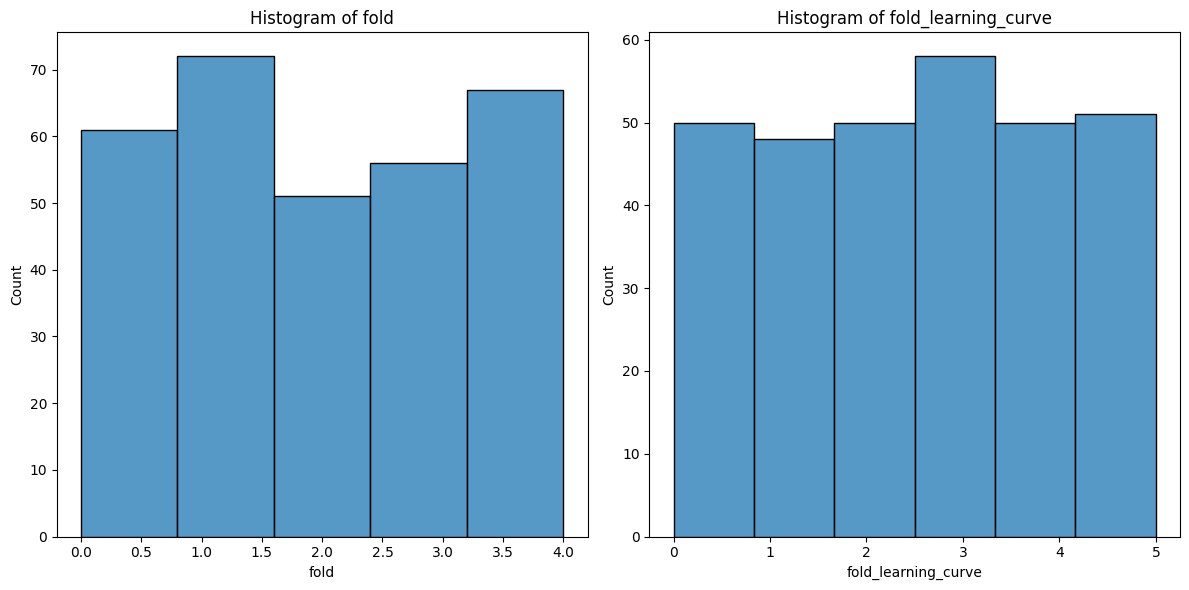

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming lab_train_data is your DataFrame
# If not, replace it with your actual DataFrame

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first histogram on the first subplot
sns.histplot(data=df, x='fold', ax=axes[0],bins=len(df['fold'].unique()))
axes[0].set_title('Histogram of fold')

# Plot the second histogram on the second subplot
sns.histplot(data=df, x='fold_learning_curve', ax=axes[1],bins=len(df['fold_learning_curve'].unique()))
axes[1].set_title('Histogram of fold_learning_curve')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()


# Conclusion EDA
In summary, our exploration of the small dataset, consisting of approximately 200 observations with 9 features encompassing hormones, gender, and age, has provided valuable insights, while also revealing areas that warrant careful consideration in future research endeavors.

 
The small size of the dataset underscores the potential benefits of incorporating more features and observations to bolster the robustness of any predictive model, especially deep learning models. While the option of increasing observations exists by incorporating lab data without corresponding MRI results <b> (und auch umgekehrt MRI Data without corresponding Lab Data...), </b>this approach introduces a trade-off in data quality. Extracting more features from MRI images is an avenue for consideration but given our commitment to developing multimodal models that combine tabular lab features with MRI picture data we choose not to do it. 
<b>(Daten extrahieren von MRI-Images und dann zusammenfügen ist auch multimodal!!, vielleicht eher multimodalen fusion Modellen ?)</b>
 
Examining feature distributions, we observed generally well-distributed patterns, with the highest sparsity (~45%) observed in the testosterone hormone. This sparsity is logically explained by the absence of testosterone testing in females. Addressing missing values appropriately is crucial to maintaining the integrity of our analyses. <b>(Hier noch erklären, was die Möglichkeiten sind...)</b>

Analyzing differences in hormone distributions associated with the target label, we identified notable associations. FSH and LH gender hormones exhibited lower values for prolactinoma cases, while the prolactin hormone displayed a wider distribution, notably higher in cases with prolactinoma. These distinctions, grounded in medical rationale, provide meaningful insights for feature selection in our tabular model development.

Furthermore, our analysis revealed intriguing patterns concerning patient age and gender in relation to the target label. Males demonstrated a slight (~5%) prevalence for prolactinomas. Additionally, age-related trends indicated a slight prevalence among younger individuals (17-39) and middle-aged individuals (40-61), while older individuals (62+) showed less prolactinomas, potentially indicating the occurrence of other types of brain tumors.

In conclusion, our exploratory analysis serves as a foundation for future investigations. The identified areas for improvement, such as the need for more features and observations, underscore the ongoing evolution of our research. Balancing data quality and quantity, understanding feature distributions, and recognizing medically significant associations will guide the development of more robust multimodal models in subsequent studies.




- small dataset (~200 observations and 9 features, 7 hormones and gender as well as age)
    - more features and more observations are probably needed
    - more observations might be possible if we decrease the dataquality by using lab data which does not correspond with an MRI, especially for deep learning models
    - more features could be extracted from MRI images but for the lab data we used all available features, we will not do it because we wanted to use multimodal models (tabular lab features and mri picture data)
- all features are distributed well, the highest sparsity value ~45% is in the testosteron hormone, this can be explained by the missing values for females which testosteron is not tested in the lab
- differences in label in distributions of hormones
    - FSH and LH gender hromones are associated with lower values for a prolactinoma, prolaktine hormone is much wider distributed (aka higher values) for cases with prolactinoma
    - both of these differences are medically explainable 
- some differences in patient age and gender for label
    - males have a little ~5% prevalence
    - younger people (17-39) have a little prevalence for a prolactinoma, middle aged (40-61) also have a little prevalence, older people (62+) might have other brain tumors